In [2]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import holidays
from datetime import date

In [3]:
goodholidays = []
for date, name in sorted(holidays.US(years=2014).items()):
    print(date,name)
    goodholidays.append(name)

2014-01-01 New Year's Day
2014-01-20 Martin Luther King, Jr. Day
2014-02-17 Washington's Birthday
2014-05-26 Memorial Day
2014-07-04 Independence Day
2014-09-01 Labor Day
2014-10-13 Columbus Day
2014-11-11 Veterans Day
2014-11-27 Thanksgiving
2014-12-25 Christmas Day


In [4]:
goodholidays.remove("New Year's Day")
goodholidays.remove("Martin Luther King, Jr. Day")
goodholidays.remove("Columbus Day")
goodholidays.remove("Veterans Day")
goodholidays.remove("Christmas Day")

In [5]:
sales = pd.DataFrame(columns =['holiday', 'ds', 'lower_window', 'upper_window'])
sales.head()

,holiday,ds,lower_window,upper_window


In [6]:
for year in range(2014,2021):
    for date, name in sorted(holidays.US(years=year).items()):
        lower_window = 0
        upper_window = 0
        if name in goodholidays:
            dayoftheweek = date.weekday()
#            print(dayoftheweek)
#            print(date,name)
            if dayoftheweek == 0:
                lower_window == -2
            if dayoftheweek == 1:
                lower_window == -3
            if dayoftheweek == 3:
                upper_window == 3
            if dayoftheweek == 4:
                upper_window == 2
            sales.loc[len(sales)] = [name,date,lower_window,upper_window]

In [7]:
sales.head()

,holiday,ds,lower_window,upper_window
0,Washington's Birthday,2014-02-17,0,0
1,Memorial Day,2014-05-26,0,0
2,Independence Day,2014-07-04,0,0
3,Labor Day,2014-09-01,0,0
4,Thanksgiving,2014-11-27,0,0


In [8]:
homedepot = pd.read_csv('homedepot.googletrends.csv', parse_dates=['period'])

In [9]:
prophetdataframe = pd.DataFrame()

In [10]:
prophetdataframe['ds'] = homedepot['period']
prophetdataframe['y'] = homedepot['value']

In [11]:
m = Prophet(holidays=sales)

In [12]:
m.add_country_holidays(country_name='US')

In [13]:
m.fit(prophetdataframe)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=365)

In [15]:
forecast = m.predict(future)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


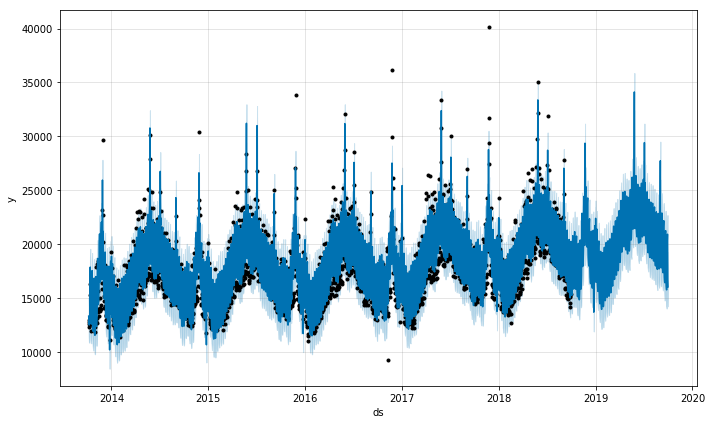

In [16]:
fig1 = m.plot(forecast)

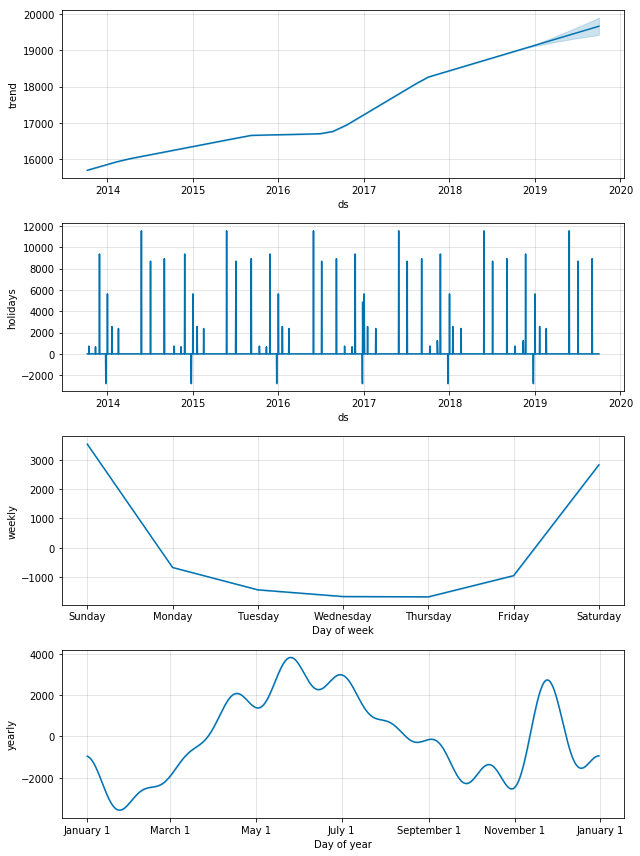

In [17]:
fig2 = m.plot_components(forecast)

In [18]:
forecast.to_csv('forecast.csv')

In [19]:
erroranalytics = m.predict(prophetdataframe)

In [20]:
erroranalytics['value'] = prophetdataframe['y']
erroranalytics['residuals'] = erroranalytics['value'] - erroranalytics['yhat']
erroranalytics['absoluteresiduals'] = abs(erroranalytics['residuals'])

In [21]:
totalerror = erroranalytics['absoluteresiduals'].sum()

In [22]:
print(totalerror/len(erroranalytics))

4697.403663435671


In [23]:
print(erroranalytics.nlargest(10, 'absoluteresiduals'))

             ds         trend    yhat_lower    yhat_upper   trend_lower  \
311  2014-08-14  16170.567532  12896.351862  16315.018548  16170.567532   
126  2014-02-10  15923.791921  10903.664871  14459.175010  15923.791921   
675  2015-08-13  16623.780921  13362.511735  17024.548429  16623.780921   
490  2015-02-09  16393.441233  11311.627688  14896.438957  16393.441233   
127  2014-02-11  15925.362552  10188.796325  13646.828692  15925.362552   
1694 2018-05-28  18718.520286  31685.562812  35045.859449  18718.520286   
1330 2017-05-29  17794.793662  30515.221130  34278.379717  17794.793662   
966  2016-05-30  16689.631223  29545.513946  32981.524439  16689.631223   
854  2016-02-08  16674.196216  11650.610837  15092.019175  16674.196216   
1039 2016-08-11  16748.046907  13682.505913  17311.006773  16748.046907   

       trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
311   16170.567532            0.0                  0.0                  0.0   
126   15923.7919

In [24]:
date = pd.to_datetime('2014-08-14')
theindex = prophetdataframe[prophetdataframe.ds == date].index

In [25]:
print(theindex)

Int64Index([1509], dtype='int64')


In [26]:
prophetdataframe = prophetdataframe.drop(theindex)